In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import os

#Read data
raw_data_path =os.path.join(os.path.pardir,os.path.pardir,'data','raw', 'Dataset9')
train_file_path = os.path.join(raw_data_path,'data.csv')
df = pd.read_csv(train_file_path)

df = df.drop([df.index[1400], df.index[303]])

df["Churn"] = df["Churn Status"]
df["Network type subscription in Month 2"] = np.where(df["Network type subscription in Month 2"].isnull(), 'Other' ,df["Network type subscription in Month 2"])
df["Network type subscription in Month 1"] = np.where(df["Network type subscription in Month 1"].isnull(), 'Other' ,df["Network type subscription in Month 1"])
df["Most Loved Competitor network in in Month 1"] = np.where(df["Most Loved Competitor network in in Month 1"].isnull(), '0' ,df["Most Loved Competitor network in in Month 1"])
ord_enc = OrdinalEncoder()
df["Network type subscription in Month 1"] = ord_enc.fit_transform(df[["Network type subscription in Month 1"]])
df["Network type subscription in Month 2"] = ord_enc.fit_transform(df[["Network type subscription in Month 2"]])
df["Most Loved Competitor network in in Month 1"] = ord_enc.fit_transform(df[["Most Loved Competitor network in in Month 1"]])
df["Most Loved Competitor network in in Month 2"] = ord_enc.fit_transform(df[["Most Loved Competitor network in in Month 2"]])

df =df.drop(['Churn Status', 'Customer ID'], axis=1)


In [2]:
proccessed_data_path =os.path.join(os.path.pardir,os.path.pardir,'data','processed')
write_train_path = os.path.join(proccessed_data_path,'dataset9.csv')
df.to_csv(write_train_path)

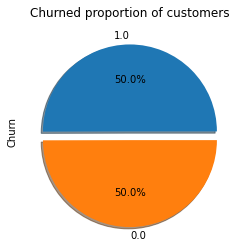

In [3]:
df.Churn.value_counts().plot(kind= 'pie', title='Churned proportion of customers', explode = [0,0.1],autopct='%1.1f%%', shadow=True);
